Task1


Combine the two resulting arrays (shakey_sobel_x and shakey_sobel_y) using Pythagoras theorem. To do this you will have to make your own function, such that:

m = magnitude(x,y)

Now display the resulting image using

show_rgb_image(m)

You can also display this edge image after thresholding it,

show_binary_image(m>40)

Create several of these with different thresholds.

QUESTION 1: What do you notice regarding the effect of changing the threshold? State both your observations and the reasons for the observations.

In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from PIL import Image
import imageio

In [3]:
def load_and_gray_scale_image(image_path):
    image = imageio.imread(image_path)
    # Convert to grayscale if it is a colored image
    if len(image.shape) == 3:
        return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.float32)
    else:
        return image.astype(np.float32)

In [4]:
# Define the Sobel operators
sobel_x = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]])

sobel_y = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]])

In [5]:
# Load the image
shakey_path = '/Users/suzanaisaac/Desktop/shakey.jpg'
shakey = load_and_gray_scale_image(shakey_path)

# Apply the Sobel filters
shakey_sobel_x = scipy.signal.convolve2d(shakey, sobel_x, mode='same', boundary='fill', fillvalue=0)
shakey_sobel_y = scipy.signal.convolve2d(shakey, sobel_y, mode='same', boundary='fill', fillvalue=0)


In [6]:
# Calculate the gradient magnitude
m = np.sqrt(shakey_sobel_x**2 + shakey_sobel_y**2)

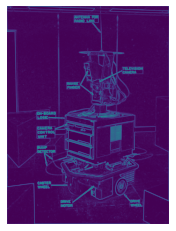

Threshold: 20


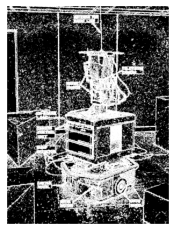

Threshold: 40


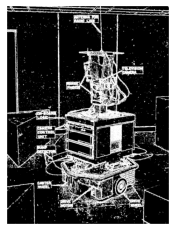

Threshold: 60


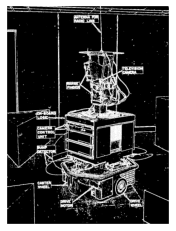

Threshold: 80


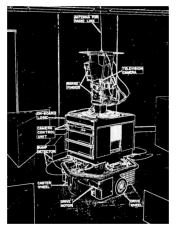

Threshold: 100


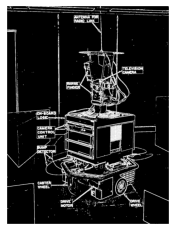

In [7]:
# Define a function to display an image
def show_image(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

# Display the gradient magnitude as an RGB image
show_image(m, cmap='viridis') # Use 'viridis' to represent the magnitude in color

# Apply different thresholds to the magnitude and display the results as binary images
thresholds = [20, 40, 60, 80, 100]
for threshold in thresholds:
    binary_image = m > threshold
    print(f"Threshold: {threshold}")
    show_image(binary_image)

Observations:
At lower thresholds (like 20), the binary image shows a lot of details, including both strong and weak edges. This happens because a low threshold considers both prominent edges and subtle variations in the gradient as edges.

As the threshold increases (40, 60), the weaker edges start to disappear from the binary images. Only the stronger edges, where the gradient magnitude is higher, remain. This is because higher thresholds ignore smaller changes in intensity.

At even higher thresholds (80, 100), very few edges are visible. This is due to the fact that only the most significant edges, which correspond to the most significant changes in intensity, have gradient magnitudes above these thresholds.

Repeat your previous exercise, with the Roberts operator.
QUESTION 2: What do you notice regarding the difference between Sobel and Roberts? State both your observations and the reasons for the observations.

In [8]:
roberts_x = np.array(
    [[1, 0],
     [0, -1]])

roberts_y = np.array(
    [[0, 1],
     [-1, 0]])

In [9]:
# Apply the Roberts filters
shakey_roberts_x = scipy.signal.convolve2d(shakey, roberts_x, mode='same', boundary='fill', fillvalue=0)
shakey_roberts_y = scipy.signal.convolve2d(shakey, roberts_y, mode='same', boundary='fill', fillvalue=0)

# Calculate the gradient magnitude for Roberts operator
m_roberts = np.sqrt(shakey_roberts_x**2 + shakey_roberts_y**2)

Roberts Gradient Magnitude Image:


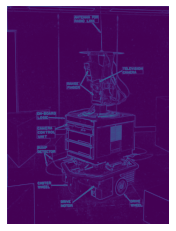

Roberts Operator - Threshold: 10


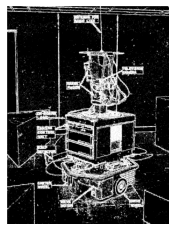

Roberts Operator - Threshold: 20


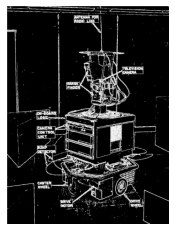

Roberts Operator - Threshold: 30


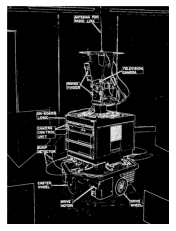

Roberts Operator - Threshold: 40


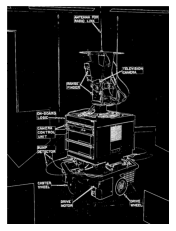

Roberts Operator - Threshold: 50


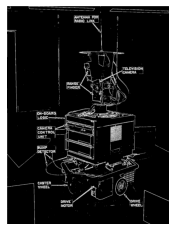

In [10]:
# Display the gradient magnitude as an RGB image for Roberts operator
print("Roberts Gradient Magnitude Image:")
show_image(m_roberts, cmap='viridis')

# Apply different thresholds to the Roberts magnitude and display the results as binary images
thresholds_roberts = [10, 20, 30, 40, 50]
for threshold in thresholds_roberts:
    binary_image_roberts = m_roberts > threshold
    print(f"Roberts Operator - Threshold: {threshold}")
    show_image(binary_image_roberts)